we've been creating plots using pyplot and matplotlib directly. When we want to explore a new dataset by quickly creating visualizations, using these tools directly can be cumbersome. Thankfully, pandas has many methods for quickly generating common plots from data in DataFrames. Like pyplot, the plotting functionality in pandas is a wrapper for matplotlib. This means we can customize the plots when necessary by accessing the underlying Figure, Axes, and other matplotlib objects.


In this guided project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations. If you're new to either our guided projects or Jupyter notebook in general, you can learn more here. You can find the solutions to this guided project here.


We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.


Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:


    Rank - Rank by median earnings (the dataset is ordered by this column).
    Major_code - Major code.
    Major - Major description.
    Major_category - Category of major.
    Total - Total number of people with major.
    Sample_size - Sample size (unweighted) of full-time.
    Men - Male graduates.
    Women - Female graduates.
    ShareWomen - Women as share of total.
    Employed - Number employed.
    Median - Median salary of full-time, year-round workers.
    Low_wage_jobs - Number in low-wage service jobs.
    Full_time - Number employed 35 hours or more.
    Part_time - Number employed less than 35 hours.
    Using visualizations, we can start to explore questions from the dataset like:


Do students in more popular majors make more money?
Using scatter plots

How many majors are predominantly male? Predominantly female?
Using histograms

Which category of majors have the most students?
Using bar plots

We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Jupyter magic %matplotlib inline so that plots are displayed inline.
%matplotlib inline

recent_grads_not_cleaned = pd.read_csv('recent-grads.csv')
print(recent_grads_not_cleaned.iloc[0])
print(recent_grads_not_cleaned.head())
print(recent_grads_not_cleaned.tail())
recent_grads = recent_grads_not_cleaned.dropna()  #Drop rows with missing values

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

# Before and After cleaning

In [15]:
uncleaned_data_row_count,uncleaned_data_col_count=(recent_grads_not_cleaned).shape
cleaned_data_row_count,cleaned_data_col_count=(recent_grads).shape

print(cleaned_data_row_count)
print(uncleaned_data_row_count)


172
173


only one row contained missing values and was dropped.

# Scatter Plots

In [ ]:
#previous-style
#recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

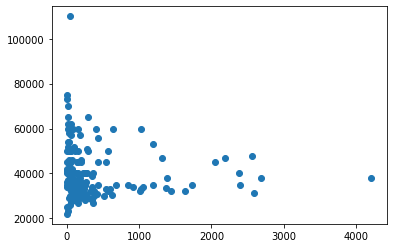

In [21]:
#dataquest style
fig, ax = plt.subplots()
ax.scatter(recent_grads['Sample_size'], recent_grads['Median'])
plt.show()

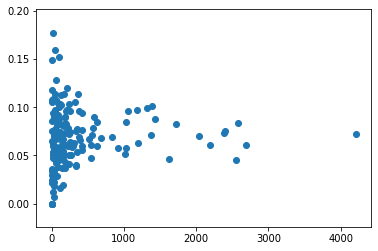

In [22]:
#recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
#dataquest style
fig, ax = plt.subplots()
ax.scatter(recent_grads['Sample_size'], recent_grads['Unemployment_rate'])
plt.show()

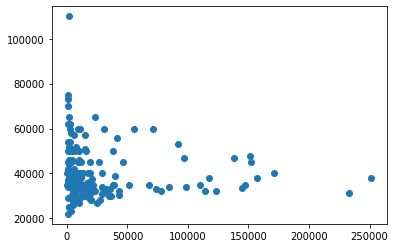

In [24]:
#recent_grads.plot(x='Full_time', y='Median', kind='scatter')
fig, ax = plt.subplots()
ax.scatter(recent_grads['Full_time'], recent_grads['Median'])
plt.show()

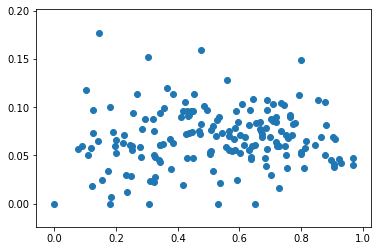

In [25]:
#recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
fig, ax = plt.subplots()
ax.scatter(recent_grads['ShareWomen'], recent_grads['Unemployment_rate'])
plt.show()

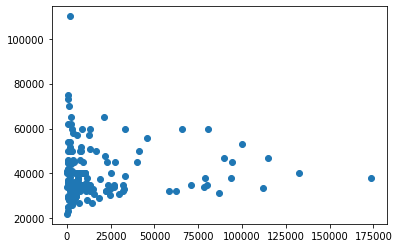

In [26]:
#recent_grads.plot(x='Men', y='Median', kind='scatter')
fig, ax = plt.subplots()
ax.scatter(recent_grads['Men'], recent_grads['Median'])
plt.show()

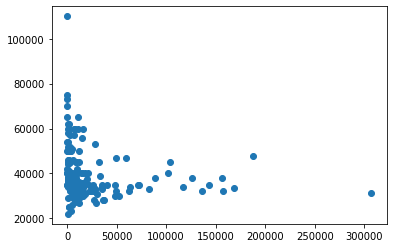

In [27]:
#recent_grads.plot(x='Women', y='Median', kind='scatter')
fig, ax = plt.subplots()
ax.scatter(recent_grads['Women'], recent_grads['Median'])
plt.show()

# Histograms

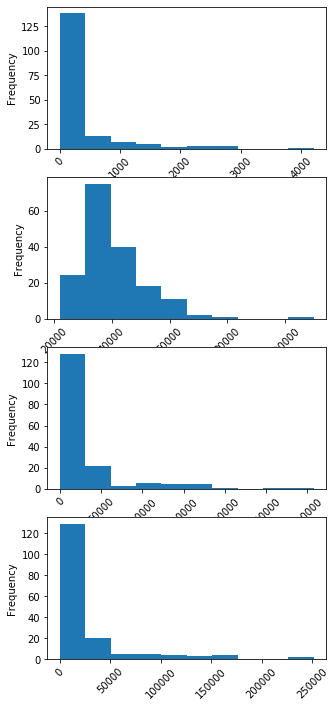

In [30]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(0,4):
    ax = fig.add_subplot(4,1,r+1)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=45)

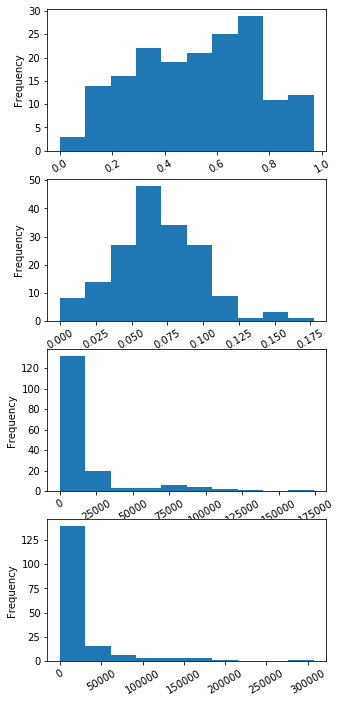

In [32]:
#recent_grads['Sample_size'].plot(kind='hist')
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(4,8):
    ax = fig.add_subplot(4,1,r-3)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=30)

# Scatter Matrix Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187F0923B48>,
      dtype=object)

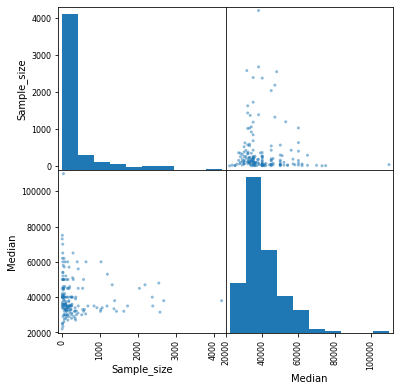

In [33]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187F0ADA5C8>,
      dtype=object)

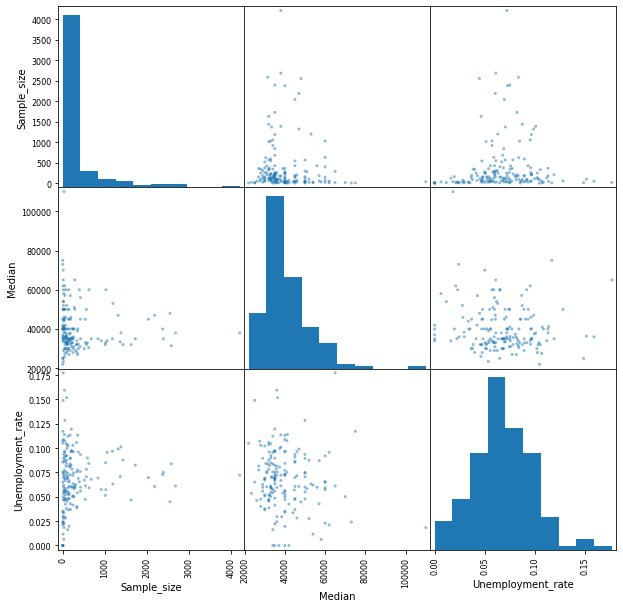

In [34]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

# Bar Plots

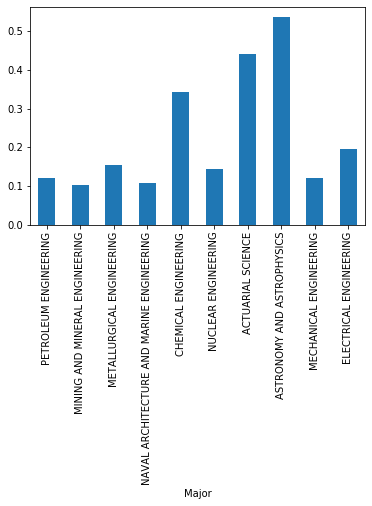

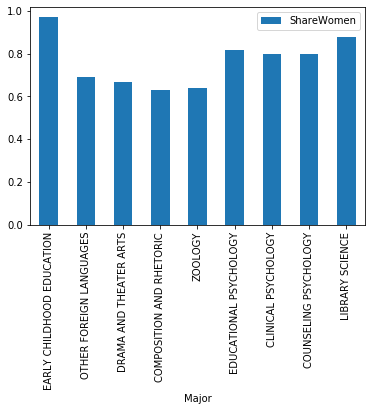

In [35]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=True)